In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_csv("vgg16_cifar10.csv")
all_data.head()

,run,operation,started,time,status,label,blocker,data_location,dataset,gpu,...,Accuracy/preprune,Loss/postprune,Loss/preprune,Sparsity,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss
0,2fce638f,main.py,2022-05-26 15:53:32,1:53:14,completed,vgg16_cifar10,square,~/torch_subspace/data/,cifar10,cuda,...,0.9354,0.376586,0.310325,0.2552,0.9263,0.335327,0.9358,0.302536,0.1,2.302552
1,026bbc00,main.py,2022-05-26 15:53:32,1:53:11,completed,vgg16_cifar10,square,~/torch_subspace/data/,cifar10,cuda,...,0.9371,0.449468,0.306907,0.9528,0.9078,0.371693,0.9382,0.290009,0.1,2.305011
2,7f06bb6a,main.py,2022-05-26 15:53:31,1:53:42,completed,vgg16_cifar10,square,~/torch_subspace/data/,cifar10,cuda,...,0.9341,2.302586,0.315364,0.9617,0.1000,2.302530,0.9342,0.306420,0.1,2.323408
3,b5235264,main.py,2022-05-26 15:53:31,1:53:27,completed,vgg16_cifar10,square,~/torch_subspace/data/,cifar10,cuda,...,0.9373,0.469806,0.302999,0.9699,0.8955,0.370045,0.9378,0.275846,0.1,2.384859
4,e6d84755,main.py,2022-05-26 15:53:30,1:54:16,completed,vgg16_cifar10,square,~/torch_subspace/data/,cifar10,cuda,...,0.9334,2.302583,0.317297,0.9779,0.1000,2.302471,0.9345,0.304152,0.1,2.373361


In [4]:
all_data = all_data[["blocker", "pruner", "best_pre_acc", "best_post_acc", "Sparsity"]]
all_data["acc_drop"] = all_data["best_pre_acc"] - all_data["best_post_acc"]
all_data.head()

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,acc_drop
0,square,alignment_output_sampling,0.9358,0.9263,0.2552,0.0095
1,square,alignment_output_sampling,0.9382,0.9078,0.9528,0.0304
2,square,alignment_output_sampling,0.9342,0.1000,0.9617,0.8342
3,square,alignment_output_sampling,0.9378,0.8955,0.9699,0.0423
4,square,alignment_output_sampling,0.9345,0.1000,0.9779,0.8345


In [5]:
all_data.sort_values(by="acc_drop")

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,acc_drop
94,alds,magnitude,0.9334,0.9422,0.3936,-0.0088
8,alds,magnitude,0.9339,0.9416,0.3950,-0.0077
85,none,alignment_output,0.9343,0.9407,0.7692,-0.0064
150,square,alignment_output,0.9320,0.9382,0.1149,-0.0062
84,none,alignment_output,0.9355,0.9416,0.5781,-0.0061
...,...,...,...,...,...,...
134,square,magnitude,0.9380,0.1000,0.9888,0.8380
128,square,magnitude,0.9381,0.1000,0.9153,0.8381
75,none,alignment_output_sampling,0.9387,0.1000,0.7749,0.8387
79,none,alignment_output_sampling,0.9389,0.1000,0.9747,0.8389


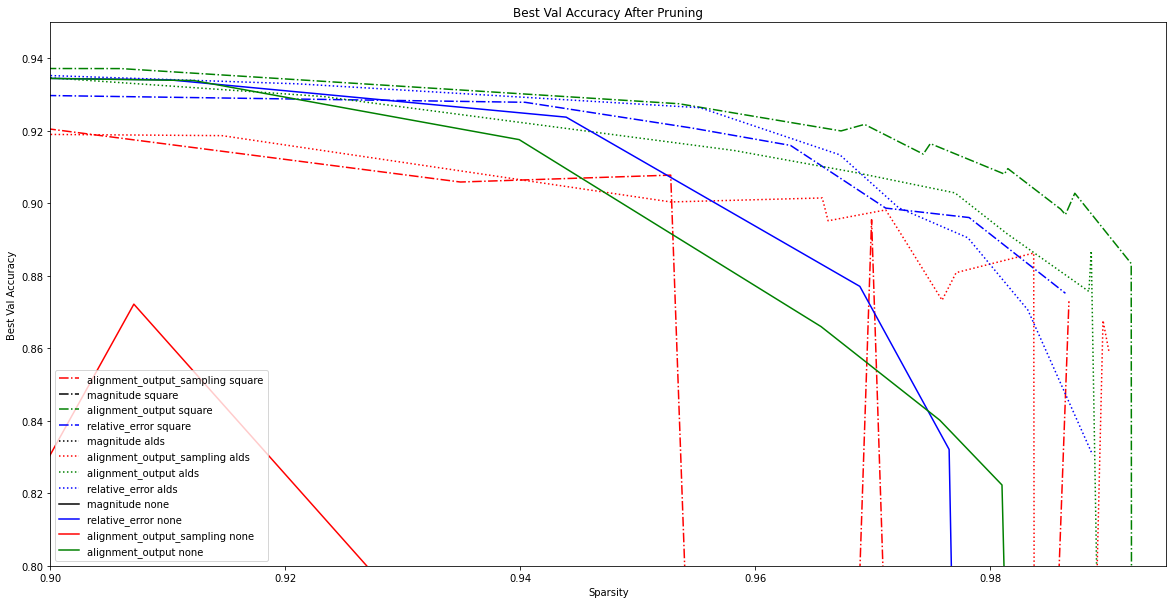

In [7]:
# data = all_data[all_data["pruner"] == "alignment_output"]
# data = all_data[all_data["blocker"] == "square"]
data = all_data
plt.figure(figsize=(20, 10))
blocker_styles = {
    "none": "-",
    "alds": ":",
    "square": "-.",
}
pruner_colors = {
    "magnitude": "black",
    "relative_error": "blue",
    "alignment_output": "green",
    "alignment_output_sampling": "red",
}
for blocker in data["blocker"].unique():
    b = data[data["blocker"] == blocker]
    for pruner in b["pruner"].unique():
        p = b[b["pruner"] == pruner].sort_values(by="Sparsity")
        plt.plot(
            p["Sparsity"],
            p["best_post_acc"],
            label=f"{pruner} {blocker}",
            linestyle=blocker_styles[blocker],
            color=pruner_colors[pruner]
        )
plt.legend()
plt.xlabel("Sparsity")
plt.ylabel("Best Val Accuracy")
plt.ylim(0.8, 0.95)
plt.xlim(0.9, 0.995)
plt.title("Best Val Accuracy After Pruning")
plt.show()
